# 导入包

In [1]:
#
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


# 数据探索
## 训练集

### 数据初步观察与清洗

In [3]:
train_data=pd.read_csv("train.csv",parse_dates = [2],low_memory = False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

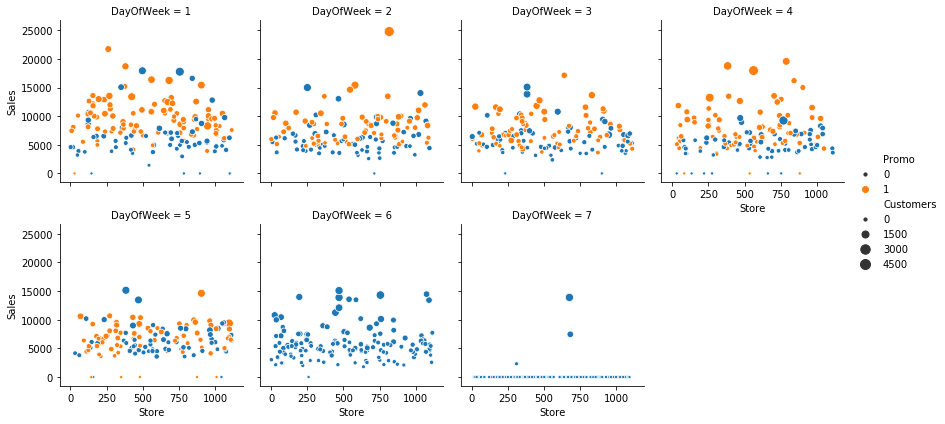

In [5]:
sns.relplot(x="Store", y="Sales", hue="Promo",size="Customers",col="DayOfWeek",sizes=(10,100),col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

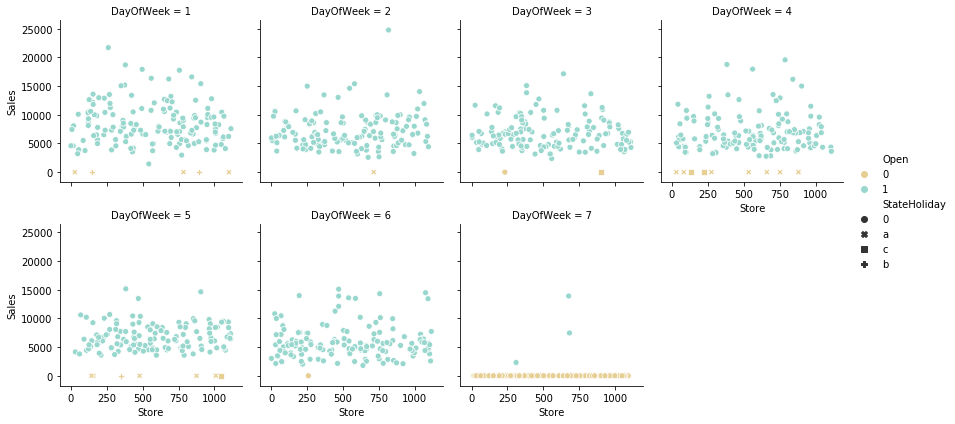

In [6]:
sns.relplot(x="Store", y="Sales", hue="Open",style="StateHoliday",col="DayOfWeek", palette="BrBG",col_wrap=4,height=3,data=train_data.sample(frac=0.001,random_state=1))

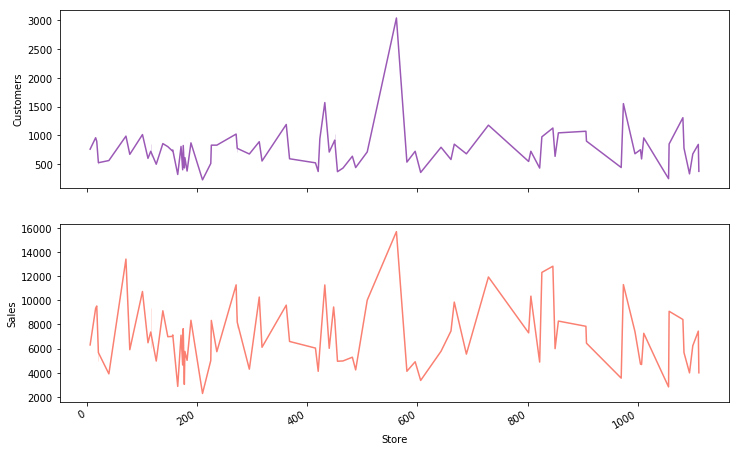

In [7]:
#
figbar, axesbar = plt.subplots(2, 1, sharey=False, figsize=(12, 8))
sns.lineplot(x="Store", y="Customers", color="#9b59b6",ax=axesbar[0],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
sns.lineplot(x="Store", y="Sales", color="salmon",ax=axesbar[1],data=train_data[train_data["Sales"]>0].sample(frac=0.0001,random_state=1))
figbar.autofmt_xdate()

可以看到顾客量的趋势与销量的趋势具有很高的相识性，所以这里加入一个新的特征--‘人均消费额（SalePerCustomer）’

In [3]:
train_data["SalePerCustomer"]=train_data["Sales"]/train_data["Customers"]

### 时序观察

D:\Anaconda\envs\data_science\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


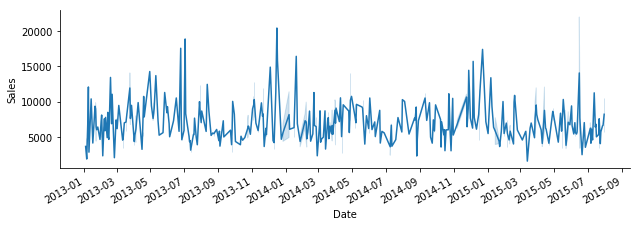

In [9]:
#
train_sales = train_data[train_data["Sales"]>0]

gsales=sns.relplot(x="Date",y="Sales",kind="line",height=3,aspect=3,data=train_sales.sample(frac=0.0005,random_state=1))
gsales.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#g.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
gsales.fig.autofmt_xdate()

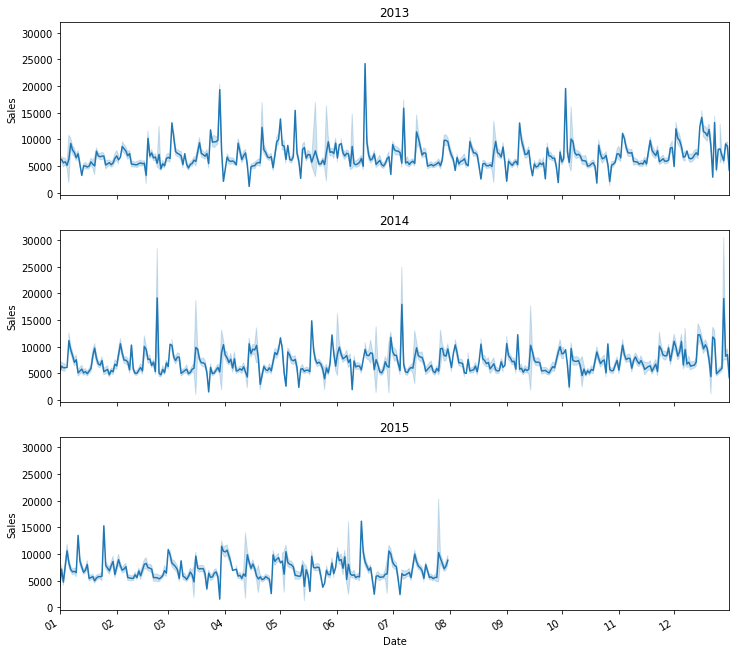

In [10]:
#
fig, axes = plt.subplots(3, 1, sharey=False, figsize=(12, 12))

for n in list(range(3)):
    #axes[n].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    #axes[n].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    axes[n].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[n].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    
sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[0])
axes[0].set_xlim('2013-1-1','2013-12-31')
axes[0].set_title('2013')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[1])
axes[1].set_xlim('2014-1-1','2014-12-31')
axes[1].set_title('2014')

sns.lineplot(x="Date",y="Sales",data=train_sales.sample(frac=0.05,random_state=1),ax=axes[2])
axes[2].set_xlim('2015-1-1','2015-12-31')
axes[2].set_title('2015')

fig.autofmt_xdate()

## 商店数据

### 数据初步观察与清洗

In [4]:
store_data = pd.read_csv("store.csv")
store_data.head(n=5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
store_data[pd.isnull(store_data.CompetitionOpenSinceMonth)].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [16]:
no_promo = store_data[pd.isnull(store_data.Promo2SinceWeek)]
no_promo[no_promo["Promo2"]==0].shape

(544, 10)

Promo2SinceWeek/Year 数据缺失是由于promo为0，所以将缺失项目都用0填充;CompetitionDistance等三项数据缺失原因不明，先以均值填充看看效果。

In [5]:
store_data["Promo2SinceWeek"].fillna(0,inplace=True)
store_data["Promo2SinceYear"].fillna(0,inplace=True)
store_data["PromoInterval"].fillna(0,inplace=True)

store_data["CompetitionDistance"].fillna(store_data["CompetitionDistance"].mean(),inplace=True)
store_data["CompetitionOpenSinceMonth"].fillna(store_data["CompetitionOpenSinceMonth"].mean(),inplace=True)
store_data["CompetitionOpenSinceYear"].fillna(store_data["CompetitionOpenSinceYear"].mean(),inplace=True)


## 与训练集融合进一步分析店铺状况

选取营业且销售额大于0的店铺

In [6]:
train_store_data = pd.merge(train_data,store_data,on="Store")
train_store_data = train_store_data[(train_store_data['Open']==1)&(train_store_data['Sales']>0)]

### 店铺种类分布情况

In [19]:
temp_tsd = train_store_data.groupby("StoreType")
tsdTpye_describe = temp_tsd.describe()
tsdTpye_describe

Store                                                     \
              count        mean         std   min    25%    50%    75%   
StoreType                                                                
a          457042.0  560.087410  325.810963   2.0  276.0  557.0  848.0   
b           15560.0  555.930077  286.817822  85.0  335.0  512.0  733.0   
c          112968.0  608.222337  325.611777   1.0  362.0  613.0  897.0   
d          258768.0  533.887432  311.987681  13.0  250.0  529.0  792.0   

                  DayOfWeek            ... Promo2SinceWeek        \
              max     count      mean  ...             75%   max   
StoreType                              ...                         
a          1114.0  457042.0  3.513502  ...            18.0  48.0   
b          1097.0   15560.0  3.998586  ...             5.0  48.0   
c          1112.0  112968.0  3.506400  ...            14.0  50.0   
d          1115.0  258768.0  3.509777  ...            28.0  49.0   

          Promo2SinceYear                                                      \
                    count         mean          std  min  25%     50%     75%   
StoreType                                                                       
a                457042.0   937.555750  1003.606049  0.0  0.0     0.0  2012.0   
b                 15560.0   580.940938   912.070935  0.0  0.0     0.0  2012.0   
c                112968.0  1000.889526  1005.761586  0.0  0.0     0.0  2011.0   
d                258768.0  1145.546053   996.075785  0.0  0.0  2009.0  2012.0   

                   
              max  
StoreType          
a          2015.0  
b          2013.0  
c          2014.0  
d          2015.0  

[4 rows x 112 columns]

([<matplotlib.patches.Wedge at 0x1e73e89d1d0>,
 [Text(-0.1423300006246476, 1.090753029297736, 'a'),
  Text(-1.045053484076021, -0.3433121253619944, 'b'),
  Text(-0.7698195044469102, -0.7857340075197928, 'c'),
  Text(0.6283304377448313, -0.9028847440307034, 'd')],
 [Text(-0.07763454579526231, 0.5949561977987651, '54%'),
  Text(-0.570029173132375, -0.18726115928836057, '2%'),
  Text(-0.4199015478801328, -0.428582185919887, '13%'),
  Text(0.3427256933153625, -0.49248258765311087, '31%')])

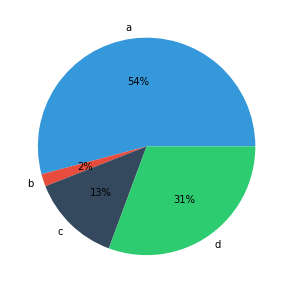

In [20]:
fracs = [tsdTpye_describe.iloc[0,0],tsdTpye_describe.iloc[1,0],tsdTpye_describe.iloc[2,0],tsdTpye_describe.iloc[3,0]]

fig = plt.figure(figsize=(5,5))
plt.pie(fracs, labels=tsdTpye_describe.index, colors=[ "#3498db", "#e74c3c", "#34495e", "#2ecc71"],autopct='%.0f%%')

### 不同类型销售量

In [21]:
temp_tsd['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


**将日期划分为年月日，便于根据分析年份与月份等分析数据**

In [7]:
#
train_store_data['Year']=train_store_data.Date.dt.year
train_store_data['Month']=train_store_data.Date.dt.month
train_store_data['Day']=train_store_data.Date.dt.day
train_store_data["WeekOfYear"]=train_store_data.Date.dt.weekofyear
train_store_data["Season"]=train_store_data.Date.dt.quarter
train_store_data['SeasonOfYear']=train_store_data['Year'].replace({2013:'2013',2014:'2014',2015:'2015'})+train_store_data["Season"].replace({1:'1',2:'2',3:'3',4:'4'})
#train_store_data["week"]=train_store_data.Date.dt.weekday # 星期

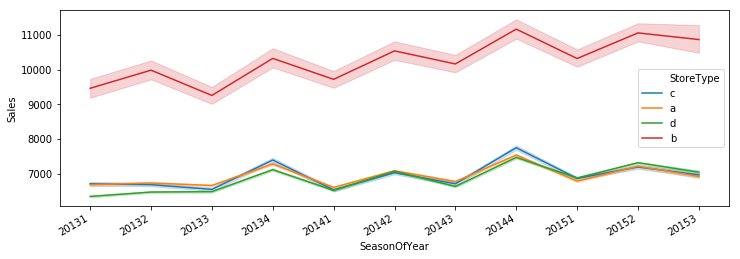

In [23]:
#
figtype, axestype = plt.subplots(1, 1, sharey=False, figsize=(12, 4))
sns.lineplot(x="SeasonOfYear", y="Sales",hue="StoreType",data=train_store_data,ax=axestype)
figtype.autofmt_xdate()

可以看到B类店铺平均销量原高于其他三类店铺，并且在2013年到2015年间保持稳定增长，而其他三类店铺则几乎没有改变，并且B类商铺要比其他三类商铺的季度波动性更强。

还可以看到四类店铺的销售额在第四季度都会有所上涨，有必要具体看看是哪个月份上涨最多。同时观察顾客量与人均销售额的趋势，因为这两项是影响销售额的直接原因。

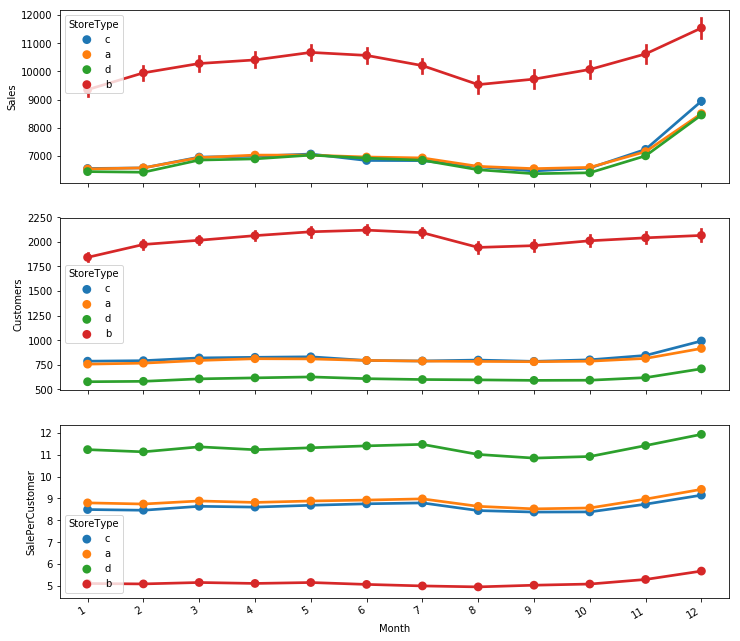

In [24]:
#
figMon_Sale_Cus, axesMon_Sale_Cus = plt.subplots(3, 1, sharey=False, figsize=(12, 12))
sns.pointplot(x="Month", y="Sales",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[0])
sns.pointplot(x="Month", y="Customers",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[1])
sns.pointplot(x="Month", y="SalePerCustomer",hue="StoreType",data=train_store_data,ax=axesMon_Sale_Cus[2])

figMon_Sale_Cus.autofmt_xdate()

四类店铺的销售、顾客量的峰值都在12月份出现，但还可以发现B类店铺的高销售额是靠大量的顾客换取的，也就是说这些顾客人均消费非常低，相反D类店铺的人均消费是最高的。

### 促销与销售额关系

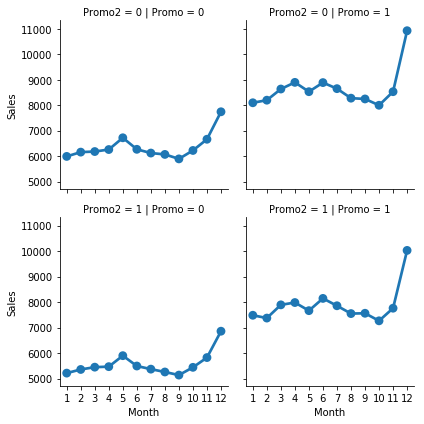

In [25]:
sns.catplot(x='Month',y='Sales',col='Promo',row='Promo2',kind='point',height=3,aspect=1,data=train_store_data)

从图中可之有短期促销的店铺销量要大于无短期促销的店铺销量；有长期促销的店铺销量低于无长期促销的店铺销量

### 节假日与销售额关系

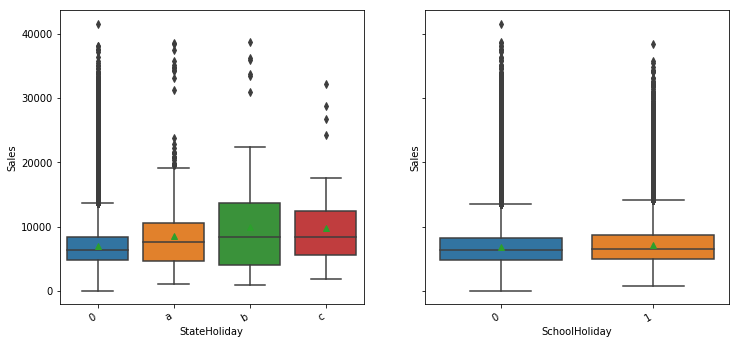

In [26]:
#
figHoli,axesHoli = plt.subplots(1,2,sharex=False,sharey=True,figsize=(12,6))

sns.boxplot(x="StateHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[0])
sns.boxplot(x="SchoolHoliday",y="Sales",
            showmeans=True,
            data=train_store_data,
            ax=axesHoli[1])

figHoli.autofmt_xdate()

从箱线图可发现在节假日开门的商铺的销售额要大于平日的销售额,在学校假期期间商铺的销售额也会略高于平日。

### 竞争对手与销售额关系

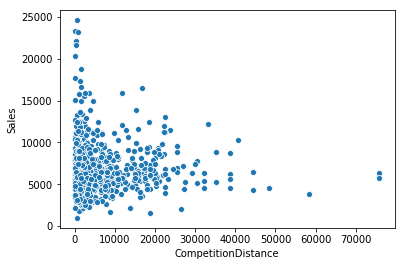

In [27]:
sns.scatterplot(x="CompetitionDistance", y="Sales",data=train_store_data.sample(frac=0.001,random_state=1))
#sns.jointplot(x="CompetitionDistance", y="Sales", data=train_store_data.sample(frac=0.0005,random_state=1));

从图中无法看出竞争对手的距离与销售额有非常必然的联系。


**构建竞争对手开业时间与促销时间特征：**

In [8]:
#
train_store_data['CompetitionOpen'] = 12 * (train_store_data.Year - train_store_data.CompetitionOpenSinceYear) + (train_store_data.Month - train_store_data.CompetitionOpenSinceMonth)
train_store_data['PromoOpen'] = 12 * (train_store_data.Year - train_store_data.Promo2SinceYear) + (train_store_data.WeekOfYear - train_store_data.Promo2SinceWeek) / 4.0
train_store_data.loc[train_store_data.Promo2SinceYear==0,'PromoOpen']=0

**构建‘是否促销月’特征**

In [9]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
train_store_data['monthStr'] = train_store_data.Month.map(month2str)
train_store_data.loc[train_store_data.PromoInterval == 0, 'PromoInterval'] = ''
train_store_data['IsPromoMonth'] = 0
for interval in train_store_data.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            train_store_data.loc[(train_store_data.monthStr == month) & (train_store_data.PromoInterval == interval), 'IsPromoMonth'] = 1

In [14]:
train_store_data.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,10.958105,61.115771
b,10233.380141,2022.211825,3.717593,66.607652
c,6933.126425,815.538073,13.964386,62.149077
d,6822.300064,606.353935,14.827699,57.808354


### 总体关联性

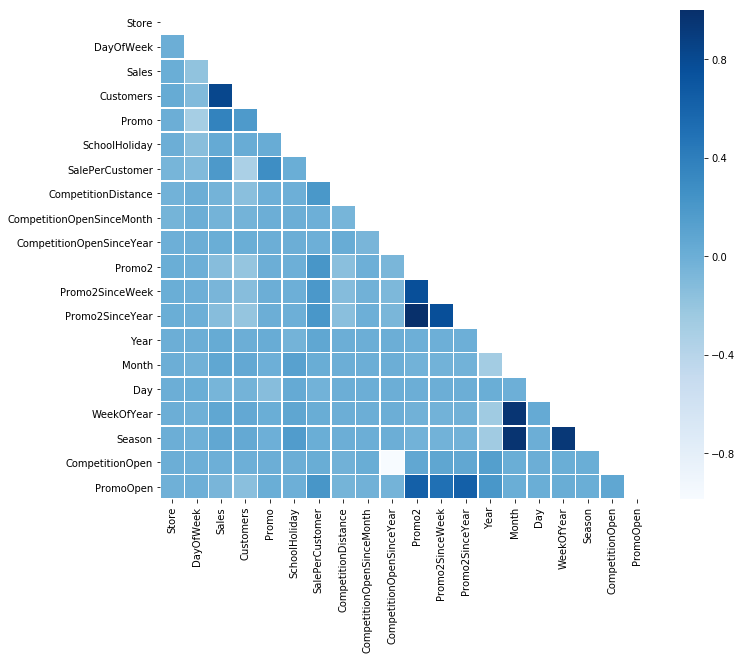

In [30]:
f, ax = plt.subplots(figsize = (11, 9))
                     
corr = train_store_data.drop("Open",axis=1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues")

## 测试集

### 数据初步观察与清洗

In [10]:
test_data=pd.read_csv("test.csv",parse_dates = [3],low_memory = False)
test_data.head(n=5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [16]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [17]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [18]:
test_data[pd.isnull(test_data.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


缺失数据来只622号店铺，时间从周一到周六，不是假日时间，且有几天还在促销，故认为是正常营业状态，以1填充缺失数据。

In [11]:
test_data["Open"].fillna(1,inplace=True)

### 合并数据

In [12]:
test_store_data = pd.merge(test_data,store_data,on="Store")

In [21]:
test_store_data.head(n=3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### 构建特征

In [13]:
#
test_store_data['Year']=test_store_data.Date.dt.year
test_store_data['Month']=test_store_data.Date.dt.month
test_store_data['Day']=test_store_data.Date.dt.day
test_store_data["WeekOfYear"]=test_store_data.Date.dt.weekofyear
test_store_data["Season"]=test_store_data.Date.dt.quarter

test_store_data['CompetitionOpen'] = 12 * (test_store_data.Year - test_store_data.CompetitionOpenSinceYear) + (test_store_data.Month - test_store_data.CompetitionOpenSinceMonth)
test_store_data['PromoOpen'] = 12 * (test_store_data.Year - test_store_data.Promo2SinceYear) + (test_store_data.WeekOfYear - test_store_data.Promo2SinceWeek) / 4.0
test_store_data.loc[test_store_data.Promo2SinceYear==0,'PromoOpen']=0

In [14]:
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
test_store_data['monthStr'] = test_store_data.Month.map(month2str)
test_store_data.loc[test_store_data.PromoInterval == 0, 'PromoInterval'] = ''
test_store_data['IsPromoMonth'] = 0
for interval in test_store_data.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            test_store_data.loc[(test_store_data.monthStr == month) & (test_store_data.PromoInterval == interval), 'IsPromoMonth'] = 1

## 其余特征处理
### 特征转换

In [15]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train_store_data.Assortment.replace(mappings,inplace=True)
train_store_data.StateHoliday.replace(mappings,inplace=True)
train_store_data.StoreType.replace(mappings,inplace=True)

test_store_data.Assortment.replace(mappings,inplace=True)
test_store_data.StateHoliday.replace(mappings,inplace=True)
test_store_data.StoreType.replace(mappings,inplace=True)

In [16]:
train_store_data['Assortment'] = train_store_data['Assortment'].astype('int')
train_store_data['StateHoliday'] = train_store_data['StateHoliday'].astype('int')

test_store_data['Assortment'] = test_store_data['Assortment'].astype('int')
test_store_data['StateHoliday'] = test_store_data['StateHoliday'].astype('int')

### 删除不必要特征

In [17]:
train_store_data.drop(['Date','Customers','Open','PromoInterval','SeasonOfYear','monthStr'], axis = 1, inplace = True)
test_store_datax = test_store_data.drop(['Id','Date','Open','PromoInterval','monthStr'], axis = 1)

### 拆分待预测特征标签

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [19]:
train_store_x = train_store_data.drop(['Sales'],axis=1)
train_store_y = np.log(train_store_data['Sales'])

X_train, X_test, y_train, y_test = train_test_split(train_store_x, 
                                                    train_store_y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

## 定义评价函数

In [3]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_dtr(yhat, y):
    y = np.expm1(y)
    yhat = np.expm1(yhat)
    return rmspe(y, yhat)

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

## 模型训练

### 决策树基准模型训练

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  make_scorer

In [46]:
dtr_model2=DecisionTreeRegressor()
dtr_model2.fit(X_train,y_train)

y_train_pred = dtr_model2.predict(X_train)
y_test_pred = dtr_model2.predict(X_test)

train_score = rmspe_dtr(y_train_pred,y_train)
test_score = rmspe_dtr(y_test_pred,y_test)
'''
train_score = rmspe(y_train,y_train_pred)
test_score = rmspe(y_test,y_test_pred)
'''
print("train",train_score)
print("test",test_score)

train 2.24718279789952e-05
test 0.20458289174813168


网格搜索优化基准模型

In [47]:
params_dtr={"max_depth":[32,35,38],"min_samples_leaf":[6,7,8,9]}
scorer = make_scorer(rmspe_dtr,greater_is_better=False)
grid_dtr=GridSearchCV(dtr_model2,params_dtr,scoring=scorer,cv=3)

In [48]:
grid_dtr_fitted = grid_dtr.fit(X_train, y_train)

In [49]:
grid_dtr_fitted.best_params_

{'max_depth': 35, 'min_samples_leaf': 8}

In [50]:
dtr_best_model = grid_dtr_fitted.best_estimator_
y_test_bestpred=dtr_best_model.predict(X_test)
test_bestscore = rmspe_dtr(y_test_bestpred,y_test)
print("test",test_bestscore)

test 0.17159499694678332


### XGB模型训练

In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

### 参数设定

In [22]:
params = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.8,
    'colsample_bytree': 1,
    'eta': 0.3,
    'max_depth':6,
    'seed': 42} 

In [22]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [23]:
xgb_model = xgb.train(params, dtrain, 300, 
                      evals = watchlist,
                      early_stopping_rounds = 50, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[17:09:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[0]	train-rmse:5.79373	test-rmse:5.7941	train-rmspe:0.996832	test-rmspe:0.996832
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 50 rounds.
[17:09:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[1]	train-rmse:4.0634	test-rmse:4.06363	train-rmspe:0.98144	test-rmspe:0.981437
[17:09:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[2]	train-rmse:2.855	test-rmse:2.85514	train-rmspe:0.937699	test-rmspe:0.937656
[17:09:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[3]	train-rmse:2.01351	test-rmse:2.01365	train-rmspe:0.855735	test-rmspe:0.855484
[17:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes

[17:09:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[41]	train-rmse:0.219172	test-rmse:0.219575	train-rmspe:0.292577	test-rmspe:0.251099
[17:09:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[42]	train-rmse:0.215839	test-rmse:0.216329	train-rmspe:0.289003	test-rmspe:0.247224
[17:09:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[43]	train-rmse:0.213541	test-rmse:0.214094	train-rmspe:0.286999	test-rmspe:0.244983
[17:09:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[44]	train-rmse:0.21303	test-rmse:0.213589	train-rmspe:0.286653	test-rmspe:0.244446
[17:09:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[45]	train-rmse:0.212174	test-rmse:0.212728	train-rmspe:0.285744	test-rmspe:0.243262
[17:09:50] 

[17:10:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[83]	train-rmse:0.167246	test-rmse:0.168216	train-rmspe:0.244339	test-rmspe:0.191301
[17:10:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[84]	train-rmse:0.166181	test-rmse:0.167145	train-rmspe:0.243683	test-rmspe:0.190314
[17:10:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[85]	train-rmse:0.164524	test-rmse:0.165426	train-rmspe:0.24212	test-rmspe:0.188123
[17:10:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[86]	train-rmse:0.163797	test-rmse:0.164705	train-rmspe:0.241419	test-rmspe:0.187369
[17:10:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[87]	train-rmse:0.163463	test-rmse:0.164387	train-rmspe:0.240772	test-rmspe:0.187091
[17:10:18] 

[17:10:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[125]	train-rmse:0.144024	test-rmse:0.145354	train-rmspe:0.221665	test-rmspe:0.166963
[17:10:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[126]	train-rmse:0.143638	test-rmse:0.144998	train-rmspe:0.221368	test-rmspe:0.166607
[17:10:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[127]	train-rmse:0.14338	test-rmse:0.144735	train-rmspe:0.223079	test-rmspe:0.166301
[17:10:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[128]	train-rmse:0.142443	test-rmse:0.143775	train-rmspe:0.222477	test-rmspe:0.16531
[17:10:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[129]	train-rmse:0.141572	test-rmse:0.142882	train-rmspe:0.221724	test-rmspe:0.164251
[17:10:

[17:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[167]	train-rmse:0.129777	test-rmse:0.131541	train-rmspe:0.211055	test-rmspe:0.149353
[17:11:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[168]	train-rmse:0.129424	test-rmse:0.131173	train-rmspe:0.21074	test-rmspe:0.148956
[17:11:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[169]	train-rmse:0.128978	test-rmse:0.130721	train-rmspe:0.210378	test-rmspe:0.148406
[17:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[170]	train-rmse:0.12869	test-rmse:0.130445	train-rmspe:0.21022	test-rmspe:0.148132
[17:11:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[171]	train-rmse:0.128269	test-rmse:0.130029	train-rmspe:0.209822	test-rmspe:0.147689
[17:11:1

[17:11:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[209]	train-rmse:0.121871	test-rmse:0.124037	train-rmspe:0.207548	test-rmspe:0.141555
[17:11:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[210]	train-rmse:0.121678	test-rmse:0.123861	train-rmspe:0.207417	test-rmspe:0.141371
[17:11:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[211]	train-rmse:0.121599	test-rmse:0.123777	train-rmspe:0.207366	test-rmspe:0.141315
[17:11:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[212]	train-rmse:0.121433	test-rmse:0.123624	train-rmspe:0.207204	test-rmspe:0.141214
[17:11:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[213]	train-rmse:0.121246	test-rmse:0.123469	train-rmspe:0.207088	test-rmspe:0.141047
[17:1

[17:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[251]	train-rmse:0.116371	test-rmse:0.119021	train-rmspe:0.201326	test-rmspe:0.135879
[17:12:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[252]	train-rmse:0.116271	test-rmse:0.118935	train-rmspe:0.200396	test-rmspe:0.135785
[17:12:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[253]	train-rmse:0.116138	test-rmse:0.118818	train-rmspe:0.200297	test-rmspe:0.135671
[17:12:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[254]	train-rmse:0.116068	test-rmse:0.118783	train-rmspe:0.200241	test-rmspe:0.135615
[17:12:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[255]	train-rmse:0.115953	test-rmse:0.118688	train-rmspe:0.200184	test-rmspe:0.135521
[17:1

[17:12:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[293]	train-rmse:0.11234	test-rmse:0.115524	train-rmspe:0.192861	test-rmspe:0.131922
[17:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[294]	train-rmse:0.112303	test-rmse:0.11549	train-rmspe:0.192856	test-rmspe:0.131903
[17:12:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[295]	train-rmse:0.112127	test-rmse:0.115319	train-rmspe:0.192575	test-rmspe:0.131675
[17:12:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[296]	train-rmse:0.112064	test-rmse:0.115256	train-rmspe:0.192523	test-rmspe:0.13162
[17:12:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[297]	train-rmse:0.112015	test-rmse:0.115224	train-rmspe:0.192466	test-rmspe:0.131593
[17:12:5

网格搜索优化XGB

In [24]:
params_skxgb = {'max_depth': 6, 
            'n_estimators': 300, # the same as num_rounds in xgboost
            'objective': 'reg:linear', 
            'subsample': 0.8, 
            'colsample_bytree': 0.8, 
            'learning_rate': 0.3, 
            'seed': 42}     

skxgb_model = XGBRegressor(**params_skxgb)

skxgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

In [25]:
params_grid = {  
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [6,10,15],
    'gamma': [0.7,0.8,0.9],
    'reg_alpha': [10,20,25]}

search_skxgb = RandomizedSearchCV(skxgb_model, params_grid, cv = 3) # 3 fold cross validation
search_skxgb.fit(X_train, y_train)

# best parameters
print(search_skxgb.best_params_); print(search_skxgb.best_score_)

{'reg_alpha': 10, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.9}
0.9093704012223507


In [28]:
params_final = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'eta': 0.2, 
    'max_depth': 15, 
    'gamma': 0.9,
    'reg_alpha': 10,
    'silent':1,
    'seed': 42} 

In [29]:
xgb_model_final = xgb.train(params_final, dtrain, 300, 
                      evals = watchlist,
                      early_stopping_rounds = 100, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[0]	train-rmse:6.61896	test-rmse:6.61944	train-rmspe:0.998698	test-rmspe:0.998698
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:5.29968	test-rmse:5.30018	train-rmspe:0.994689	test-rmspe:0.994689
[2]	train-rmse:4.24522	test-rmse:4.24571	train-rmspe:0.984496	test-rmspe:0.984497
[3]	train-rmse:3.40297	test-rmse:3.40341	train-rmspe:0.963843	test-rmspe:0.963839
[4]	train-rmse:2.73046	test-rmse:2.73085	train-rmspe:0.929201	test-rmspe:0.929169
[5]	train-rmse:2.19451	test-rmse:2.19493	train-rmspe:0.8791	test-rmspe:0.878983
[6]	train-rmse:1.76729	test-rmse:1.76776	train-rmspe:0.815444	test-rmspe:0.815134
[7]	train-rmse:1.42658	test-rmse:1.42718	train-rmspe:0.742504	test-rmspe:0.741787
[8]	train-rmse:1.15696	test-rmse:1.15754	train-rmspe:0.665116	test-rmspe:0.663604
[9]	train-rmse:0.943231	test-rmse:0.94384	train-rmspe:0.589172	test-rmspe:0.586551
[10]	train-rmse:0.773911	test-rmse:

[96]	train-rmse:0.125081	test-rmse:0.126076	train-rmspe:0.212777	test-rmspe:0.145882
[97]	train-rmse:0.125028	test-rmse:0.126024	train-rmspe:0.21273	test-rmspe:0.145821
[98]	train-rmse:0.124842	test-rmse:0.125827	train-rmspe:0.212525	test-rmspe:0.14559
[99]	train-rmse:0.124787	test-rmse:0.125775	train-rmspe:0.212459	test-rmspe:0.145544
[100]	train-rmse:0.124728	test-rmse:0.125719	train-rmspe:0.212424	test-rmspe:0.145492
[101]	train-rmse:0.124695	test-rmse:0.125689	train-rmspe:0.212436	test-rmspe:0.145465
[102]	train-rmse:0.124677	test-rmse:0.125675	train-rmspe:0.212411	test-rmspe:0.145457
[103]	train-rmse:0.124531	test-rmse:0.125537	train-rmspe:0.21232	test-rmspe:0.145334
[104]	train-rmse:0.124509	test-rmse:0.125515	train-rmspe:0.212287	test-rmspe:0.145307
[105]	train-rmse:0.124419	test-rmse:0.125429	train-rmspe:0.212446	test-rmspe:0.145269
[106]	train-rmse:0.124402	test-rmse:0.125415	train-rmspe:0.21243	test-rmspe:0.145274
[107]	train-rmse:0.12432	test-rmse:0.125334	train-rmspe:0.2123

[192]	train-rmse:0.120531	test-rmse:0.121596	train-rmspe:0.210464	test-rmspe:0.140461
[193]	train-rmse:0.120531	test-rmse:0.121596	train-rmspe:0.210464	test-rmspe:0.140461
[194]	train-rmse:0.120512	test-rmse:0.121578	train-rmspe:0.210442	test-rmspe:0.140427
[195]	train-rmse:0.120512	test-rmse:0.121578	train-rmspe:0.210442	test-rmspe:0.140427
[196]	train-rmse:0.120489	test-rmse:0.121558	train-rmspe:0.210347	test-rmspe:0.140411
[197]	train-rmse:0.120489	test-rmse:0.121558	train-rmspe:0.210346	test-rmspe:0.14041
[198]	train-rmse:0.120476	test-rmse:0.121545	train-rmspe:0.210344	test-rmspe:0.140395
[199]	train-rmse:0.120458	test-rmse:0.121527	train-rmspe:0.210305	test-rmspe:0.140378
[200]	train-rmse:0.120413	test-rmse:0.12148	train-rmspe:0.21028	test-rmspe:0.140318
[201]	train-rmse:0.120402	test-rmse:0.12147	train-rmspe:0.210281	test-rmspe:0.140318
[202]	train-rmse:0.120402	test-rmse:0.12147	train-rmspe:0.21028	test-rmspe:0.140318
[203]	train-rmse:0.120349	test-rmse:0.121415	train-rmspe:0.2

[288]	train-rmse:0.119145	test-rmse:0.12025	train-rmspe:0.209248	test-rmspe:0.139052
[289]	train-rmse:0.119135	test-rmse:0.120242	train-rmspe:0.209222	test-rmspe:0.139043
[290]	train-rmse:0.119135	test-rmse:0.120242	train-rmspe:0.209222	test-rmspe:0.139042
[291]	train-rmse:0.119118	test-rmse:0.120225	train-rmspe:0.209178	test-rmspe:0.139026
[292]	train-rmse:0.119118	test-rmse:0.120225	train-rmspe:0.20917	test-rmspe:0.13902
[293]	train-rmse:0.119093	test-rmse:0.120204	train-rmspe:0.209079	test-rmspe:0.139014
[294]	train-rmse:0.119093	test-rmse:0.120204	train-rmspe:0.209077	test-rmspe:0.139013
[295]	train-rmse:0.119067	test-rmse:0.120179	train-rmspe:0.209047	test-rmspe:0.138971
[296]	train-rmse:0.119051	test-rmse:0.120163	train-rmspe:0.209035	test-rmspe:0.138959
[297]	train-rmse:0.119034	test-rmse:0.120146	train-rmspe:0.209013	test-rmspe:0.138934
[298]	train-rmse:0.119026	test-rmse:0.12014	train-rmspe:0.209009	test-rmspe:0.138929
[299]	train-rmse:0.119002	test-rmse:0.120121	train-rmspe:0

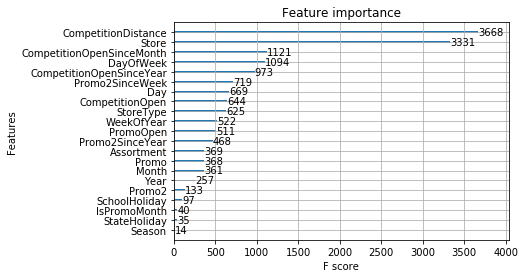

In [32]:
xgb.plot_importance(xgb_model_final)

In [ ]:
unseen = xgb.DMatrix(test_store_datax)

In [32]:
#
test_predict = xgb_model_final.predict(unseen)

forecasts = pd.DataFrame({'Id': test_store_data['Id'], 
                          'Sales': np.exp(test_predict)})
forecasts.head()

,Id,Sales
0,1,4366.302734
1,857,4496.148438
2,1713,5002.268555
3,2569,5881.882812
4,3425,4469.625000


In [33]:
forecasts.to_csv('forecasts18.csv',index = False)

----
----

# 修改：

In [4]:
def features_create(data):
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +(data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
    return data

In [5]:
train_data_md=pd.read_csv("train.csv",parse_dates = [2],low_memory = False)
test_data_md=pd.read_csv("test.csv",parse_dates = [3],low_memory = False)
store_data_md = pd.read_csv("store.csv",low_memory=False)

In [6]:
store_data_md["Promo2SinceWeek"].fillna(0,inplace=True)
store_data_md["Promo2SinceYear"].fillna(0,inplace=True)
store_data_md["PromoInterval"].fillna(0,inplace=True)

store_data_md["CompetitionDistance"].fillna(store_data_md["CompetitionDistance"].mean(),inplace=True)
store_data_md["CompetitionOpenSinceMonth"].fillna(store_data_md["CompetitionOpenSinceMonth"].mean(),inplace=True)
store_data_md["CompetitionOpenSinceYear"].fillna(store_data_md["CompetitionOpenSinceYear"].mean(),inplace=True)

test_data_md["Open"].fillna(1,inplace=True)

In [7]:
train_store_data_md = pd.merge(train_data_md,store_data_md,on="Store")
test_store_data_md = pd.merge(test_data_md,store_data_md,on="Store")

**修改1：使用时间顺序划分模型：**

In [8]:
train_store_data_md = train_store_data_md.sort_values(['Date'],ascending = False)
X_test_md = train_store_data_md[:6*7*1115]
X_train_md = train_store_data_md[6*7*1115:]

X_test_md = X_test_md[X_test_md["Open"] != 0]
X_test_md = X_test_md[X_test_md["Sales"] > 0]
X_train_md = X_train_md[X_train_md["Open"] != 0]
X_train_md = X_train_md[X_train_md["Sales"] > 0]

In [9]:
features_create(X_train_md)
features_create(X_test_md)
features_create(test_store_data_md)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.000000,24189.50,Sept,0
1,857,1,2,2015-09-16,1.0,1,0,0,3,1,...,0.0,,2015,9,16,38,84.000000,24189.50,Sept,0
2,1713,1,1,2015-09-15,1.0,1,0,0,3,1,...,0.0,,2015,9,15,38,84.000000,24189.50,Sept,0
3,2569,1,0,2015-09-14,1.0,1,0,0,3,1,...,0.0,,2015,9,14,38,84.000000,24189.50,Sept,0
4,3425,1,6,2015-09-13,0.0,0,0,0,3,1,...,0.0,,2015,9,13,37,84.000000,24189.25,Sept,0
5,4281,1,5,2015-09-12,1.0,0,0,0,3,1,...,0.0,,2015,9,12,37,84.000000,24189.25,Sept,0
6,5137,1,4,2015-09-11,1.0,0,0,0,3,1,...,0.0,,2015,9,11,37,84.000000,24189.25,Sept,0
7,5993,1,3,2015-09-10,1.0,0,0,0,3,1,...,0.0,,2015,9,10,37,84.000000,24189.25,Sept,0
8,6849,1,2,2015-09-09,1.0,0,0,0,3,1,...,0.0,,2015,9,9,37,84.000000,24189.25,Sept,0
9,7705,1,1,2015-09-08,1.0,0,0,0,3,1,...,0.0,,2015,9,8,37,84.000000,24189.25,Sept,0


In [10]:
X_train_md.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
X_test_md.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
test_store_datax_md=test_store_data_md.drop(['Id','Date','Open','PromoInterval','monthStr'], axis = 1)

In [11]:
X_train_md['Assortment'] = X_train_md['Assortment'].astype('int')
X_train_md['StateHoliday'] = X_train_md['StateHoliday'].astype('int')

X_test_md['Assortment'] = X_test_md['Assortment'].astype('int')
X_test_md['StateHoliday'] = X_test_md['StateHoliday'].astype('int')

test_store_datax_md['Assortment'] = test_store_datax_md['Assortment'].astype('int')
test_store_datax_md['StateHoliday'] = test_store_datax_md['StateHoliday'].astype('int')

In [12]:
X_xtrain_md = X_train_md.drop(['Sales'],axis=1 )
X_ytrain_md = np.log1p(X_train_md.Sales)
X_xtest_md = X_test_md.drop(['Sales'],axis=1 )
X_ytest_md = np.log1p(X_test_md.Sales)

**修改2：将学习率调低至0.03进行训练**

In [13]:
params_final_md = {
    'booster': 'gbtree', 
    'objective': 'reg:linear', 
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    'eta': 0.03, 
    'max_depth': 15, 
    'gamma': 0.9,
    'reg_alpha': 10,
    'silent':1,
    'seed': 42} 

In [14]:
dtrain_md = xgb.DMatrix(X_xtrain_md, X_ytrain_md)
dtest_md = xgb.DMatrix(X_xtest_md, X_ytest_md)

watchlist_md = [(dtrain_md, 'train'), (dtest_md, 'eval')]

In [15]:
xgb_model_final_md = xgb.train(params_final_md, dtrain_md,6000, 
                      evals = watchlist_md,
                      early_stopping_rounds = 100, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[0]	train-rmse:8.02081	eval-rmse:8.02802	train-rmspe:0.999808	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.78071	eval-rmse:7.78809	train-rmspe:0.99971	eval-rmspe:0.999714
[2]	train-rmse:7.54781	eval-rmse:7.55568	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32193	eval-rmse:7.33042	train-rmspe:0.999443	eval-rmspe:0.99945
[4]	train-rmse:7.10284	eval-rmse:7.11171	train-rmspe:0.999265	eval-rmspe:0.999275
[5]	train-rmse:6.89034	eval-rmse:6.89961	train-rmspe:0.999051	eval-rmspe:0.999065
[6]	train-rmse:6.68423	eval-rmse:6.69407	train-rmspe:0.998795	eval-rmspe:0.998814
[7]	train-rmse:6.48437	eval-rmse:6.49402	train-rmspe:0.998491	eval-rmspe:0.998514
[8]	train-rmse:6.29047	eval-rmse:6.30035	train-rmspe:0.998133	eval-rmspe:0.998161
[9]	train-rmse:6.10241	eval-rmse:6.11286	train-rmspe:0.997713	eval-rmspe:0.997749
[10]	train-rmse:5.92004	eval-rmse:5.9

[97]	train-rmse:0.501215	eval-rmse:0.494823	train-rmspe:0.383915	eval-rmspe:0.36811
[98]	train-rmse:0.489204	eval-rmse:0.482638	train-rmspe:0.377711	eval-rmspe:0.361293
[99]	train-rmse:0.478888	eval-rmse:0.472105	train-rmspe:0.372262	eval-rmspe:0.355153
[100]	train-rmse:0.468077	eval-rmse:0.4613	train-rmspe:0.366556	eval-rmspe:0.348873
[101]	train-rmse:0.457626	eval-rmse:0.45081	train-rmspe:0.361124	eval-rmspe:0.342863
[102]	train-rmse:0.446631	eval-rmse:0.439875	train-rmspe:0.355388	eval-rmspe:0.336557
[103]	train-rmse:0.436535	eval-rmse:0.430222	train-rmspe:0.350013	eval-rmspe:0.330873
[104]	train-rmse:0.427764	eval-rmse:0.421198	train-rmspe:0.3454	eval-rmspe:0.32557
[105]	train-rmse:0.419374	eval-rmse:0.412772	train-rmspe:0.340982	eval-rmspe:0.320542
[106]	train-rmse:0.410775	eval-rmse:0.404289	train-rmspe:0.336473	eval-rmspe:0.315579
[107]	train-rmse:0.40322	eval-rmse:0.396761	train-rmspe:0.332606	eval-rmspe:0.311138
[108]	train-rmse:0.395865	eval-rmse:0.389709	train-rmspe:0.328833

[193]	train-rmse:0.173295	eval-rmse:0.186881	train-rmspe:0.226068	eval-rmspe:0.196094
[194]	train-rmse:0.172337	eval-rmse:0.186011	train-rmspe:0.225528	eval-rmspe:0.195351
[195]	train-rmse:0.17105	eval-rmse:0.184805	train-rmspe:0.224633	eval-rmspe:0.194216
[196]	train-rmse:0.170332	eval-rmse:0.184196	train-rmspe:0.224157	eval-rmspe:0.193722
[197]	train-rmse:0.169848	eval-rmse:0.183831	train-rmspe:0.224073	eval-rmspe:0.19356
[198]	train-rmse:0.169069	eval-rmse:0.183029	train-rmspe:0.223475	eval-rmspe:0.192856
[199]	train-rmse:0.168528	eval-rmse:0.182888	train-rmspe:0.223315	eval-rmspe:0.192848
[200]	train-rmse:0.167749	eval-rmse:0.182224	train-rmspe:0.223058	eval-rmspe:0.192227
[201]	train-rmse:0.16682	eval-rmse:0.181333	train-rmspe:0.222469	eval-rmspe:0.191407
[202]	train-rmse:0.166004	eval-rmse:0.180645	train-rmspe:0.222025	eval-rmspe:0.190877
[203]	train-rmse:0.165728	eval-rmse:0.18057	train-rmspe:0.221981	eval-rmspe:0.190979
[204]	train-rmse:0.165376	eval-rmse:0.180577	train-rmspe:0

[289]	train-rmse:0.138643	eval-rmse:0.159909	train-rmspe:0.204303	eval-rmspe:0.173374
[290]	train-rmse:0.138354	eval-rmse:0.159667	train-rmspe:0.203944	eval-rmspe:0.17309
[291]	train-rmse:0.138258	eval-rmse:0.159553	train-rmspe:0.20387	eval-rmspe:0.172954
[292]	train-rmse:0.138118	eval-rmse:0.159462	train-rmspe:0.203776	eval-rmspe:0.172875
[293]	train-rmse:0.137947	eval-rmse:0.159368	train-rmspe:0.203629	eval-rmspe:0.172804
[294]	train-rmse:0.137809	eval-rmse:0.159366	train-rmspe:0.203525	eval-rmspe:0.172858
[295]	train-rmse:0.13764	eval-rmse:0.159229	train-rmspe:0.203449	eval-rmspe:0.172694
[296]	train-rmse:0.137433	eval-rmse:0.159013	train-rmspe:0.2033	eval-rmspe:0.172444
[297]	train-rmse:0.137359	eval-rmse:0.158962	train-rmspe:0.203184	eval-rmspe:0.172431
[298]	train-rmse:0.136923	eval-rmse:0.158527	train-rmspe:0.202891	eval-rmspe:0.171947
[299]	train-rmse:0.136885	eval-rmse:0.158579	train-rmspe:0.202839	eval-rmspe:0.172053
[300]	train-rmse:0.136706	eval-rmse:0.158418	train-rmspe:0.

[385]	train-rmse:0.126164	eval-rmse:0.149353	train-rmspe:0.195539	eval-rmspe:0.162266
[386]	train-rmse:0.126135	eval-rmse:0.149308	train-rmspe:0.195531	eval-rmspe:0.162194
[387]	train-rmse:0.126094	eval-rmse:0.149269	train-rmspe:0.195498	eval-rmspe:0.162162
[388]	train-rmse:0.125953	eval-rmse:0.149173	train-rmspe:0.195575	eval-rmspe:0.162028
[389]	train-rmse:0.125919	eval-rmse:0.149141	train-rmspe:0.195578	eval-rmspe:0.161987
[390]	train-rmse:0.125871	eval-rmse:0.14905	train-rmspe:0.195531	eval-rmspe:0.161901
[391]	train-rmse:0.125836	eval-rmse:0.149066	train-rmspe:0.195504	eval-rmspe:0.161939
[392]	train-rmse:0.125768	eval-rmse:0.148986	train-rmspe:0.195436	eval-rmspe:0.161851
[393]	train-rmse:0.125584	eval-rmse:0.148811	train-rmspe:0.195316	eval-rmspe:0.161647
[394]	train-rmse:0.12554	eval-rmse:0.148866	train-rmspe:0.195284	eval-rmspe:0.161727
[395]	train-rmse:0.125443	eval-rmse:0.148782	train-rmspe:0.195132	eval-rmspe:0.161626
[396]	train-rmse:0.12542	eval-rmse:0.148789	train-rmspe:

[481]	train-rmse:0.120651	eval-rmse:0.144356	train-rmspe:0.191488	eval-rmspe:0.156845
[482]	train-rmse:0.12063	eval-rmse:0.144324	train-rmspe:0.191472	eval-rmspe:0.156816
[483]	train-rmse:0.120578	eval-rmse:0.144281	train-rmspe:0.191404	eval-rmspe:0.156767
[484]	train-rmse:0.120552	eval-rmse:0.144247	train-rmspe:0.191363	eval-rmspe:0.156749
[485]	train-rmse:0.120523	eval-rmse:0.144218	train-rmspe:0.191332	eval-rmspe:0.156722
[486]	train-rmse:0.120493	eval-rmse:0.144193	train-rmspe:0.191309	eval-rmspe:0.156694
[487]	train-rmse:0.1204	eval-rmse:0.144101	train-rmspe:0.191228	eval-rmspe:0.156591
[488]	train-rmse:0.120361	eval-rmse:0.144064	train-rmspe:0.191196	eval-rmspe:0.156549
[489]	train-rmse:0.120343	eval-rmse:0.144032	train-rmspe:0.191178	eval-rmspe:0.156515
[490]	train-rmse:0.120327	eval-rmse:0.144025	train-rmspe:0.19116	eval-rmspe:0.15651
[491]	train-rmse:0.120267	eval-rmse:0.143959	train-rmspe:0.191102	eval-rmspe:0.156435
[492]	train-rmse:0.12025	eval-rmse:0.143939	train-rmspe:0.1

[577]	train-rmse:0.118016	eval-rmse:0.141914	train-rmspe:0.189382	eval-rmspe:0.15421
[578]	train-rmse:0.117984	eval-rmse:0.141879	train-rmspe:0.189363	eval-rmspe:0.154172
[579]	train-rmse:0.117949	eval-rmse:0.141848	train-rmspe:0.189401	eval-rmspe:0.15413
[580]	train-rmse:0.117918	eval-rmse:0.141806	train-rmspe:0.189343	eval-rmspe:0.154098
[581]	train-rmse:0.117907	eval-rmse:0.141786	train-rmspe:0.189335	eval-rmspe:0.154075
[582]	train-rmse:0.117888	eval-rmse:0.14177	train-rmspe:0.189323	eval-rmspe:0.154056
[583]	train-rmse:0.117865	eval-rmse:0.141756	train-rmspe:0.189308	eval-rmspe:0.154044
[584]	train-rmse:0.117852	eval-rmse:0.141744	train-rmspe:0.189302	eval-rmspe:0.154035
[585]	train-rmse:0.117812	eval-rmse:0.141703	train-rmspe:0.189257	eval-rmspe:0.153987
[586]	train-rmse:0.117797	eval-rmse:0.141685	train-rmspe:0.189242	eval-rmspe:0.153963
[587]	train-rmse:0.117791	eval-rmse:0.141678	train-rmspe:0.189234	eval-rmspe:0.153954
[588]	train-rmse:0.11776	eval-rmse:0.141657	train-rmspe:0

[673]	train-rmse:0.116318	eval-rmse:0.140417	train-rmspe:0.188245	eval-rmspe:0.152504
[674]	train-rmse:0.116309	eval-rmse:0.140403	train-rmspe:0.188238	eval-rmspe:0.152485
[675]	train-rmse:0.116304	eval-rmse:0.140397	train-rmspe:0.188234	eval-rmspe:0.152481
[676]	train-rmse:0.116304	eval-rmse:0.140398	train-rmspe:0.188234	eval-rmspe:0.152481
[677]	train-rmse:0.116297	eval-rmse:0.140391	train-rmspe:0.18823	eval-rmspe:0.152474
[678]	train-rmse:0.116295	eval-rmse:0.14039	train-rmspe:0.18823	eval-rmspe:0.152474
[679]	train-rmse:0.116287	eval-rmse:0.14039	train-rmspe:0.188209	eval-rmspe:0.152481
[680]	train-rmse:0.116278	eval-rmse:0.140379	train-rmspe:0.18825	eval-rmspe:0.152471
[681]	train-rmse:0.116243	eval-rmse:0.14035	train-rmspe:0.188162	eval-rmspe:0.152439
[682]	train-rmse:0.116243	eval-rmse:0.14035	train-rmspe:0.188162	eval-rmspe:0.152439
[683]	train-rmse:0.116235	eval-rmse:0.140343	train-rmspe:0.188201	eval-rmspe:0.152431
[684]	train-rmse:0.116197	eval-rmse:0.140301	train-rmspe:0.18

[769]	train-rmse:0.115179	eval-rmse:0.139351	train-rmspe:0.187011	eval-rmspe:0.151287
[770]	train-rmse:0.115168	eval-rmse:0.139345	train-rmspe:0.186992	eval-rmspe:0.151284
[771]	train-rmse:0.115155	eval-rmse:0.139336	train-rmspe:0.186992	eval-rmspe:0.151271
[772]	train-rmse:0.115139	eval-rmse:0.139316	train-rmspe:0.186983	eval-rmspe:0.151254
[773]	train-rmse:0.115127	eval-rmse:0.139319	train-rmspe:0.186977	eval-rmspe:0.151263
[774]	train-rmse:0.115117	eval-rmse:0.139313	train-rmspe:0.186967	eval-rmspe:0.151256
[775]	train-rmse:0.115111	eval-rmse:0.139298	train-rmspe:0.186963	eval-rmspe:0.151243
[776]	train-rmse:0.115087	eval-rmse:0.139273	train-rmspe:0.186937	eval-rmspe:0.151204
[777]	train-rmse:0.115085	eval-rmse:0.139272	train-rmspe:0.186936	eval-rmspe:0.151203
[778]	train-rmse:0.115081	eval-rmse:0.139266	train-rmspe:0.186933	eval-rmspe:0.151197
[779]	train-rmse:0.115078	eval-rmse:0.139259	train-rmspe:0.186933	eval-rmspe:0.151184
[780]	train-rmse:0.115068	eval-rmse:0.139246	train-rms

[865]	train-rmse:0.114365	eval-rmse:0.138563	train-rmspe:0.186379	eval-rmspe:0.150435
[866]	train-rmse:0.114335	eval-rmse:0.138537	train-rmspe:0.186358	eval-rmspe:0.150406
[867]	train-rmse:0.114326	eval-rmse:0.138532	train-rmspe:0.186352	eval-rmspe:0.150398
[868]	train-rmse:0.114316	eval-rmse:0.138522	train-rmspe:0.186321	eval-rmspe:0.150386
[869]	train-rmse:0.114313	eval-rmse:0.138517	train-rmspe:0.186315	eval-rmspe:0.150378
[870]	train-rmse:0.1143	eval-rmse:0.138506	train-rmspe:0.186304	eval-rmspe:0.150365
[871]	train-rmse:0.114296	eval-rmse:0.1385	train-rmspe:0.186299	eval-rmspe:0.150356
[872]	train-rmse:0.11429	eval-rmse:0.138508	train-rmspe:0.186293	eval-rmspe:0.150366
[873]	train-rmse:0.114286	eval-rmse:0.138505	train-rmspe:0.186282	eval-rmspe:0.150363
[874]	train-rmse:0.114282	eval-rmse:0.138503	train-rmspe:0.186279	eval-rmspe:0.150361
[875]	train-rmse:0.114274	eval-rmse:0.138492	train-rmspe:0.186264	eval-rmspe:0.150347
[876]	train-rmse:0.114266	eval-rmse:0.13849	train-rmspe:0.1

[961]	train-rmse:0.113721	eval-rmse:0.137979	train-rmspe:0.185881	eval-rmspe:0.149798
[962]	train-rmse:0.113721	eval-rmse:0.137979	train-rmspe:0.185881	eval-rmspe:0.149799
[963]	train-rmse:0.113718	eval-rmse:0.137977	train-rmspe:0.185881	eval-rmspe:0.149795
[964]	train-rmse:0.113708	eval-rmse:0.137966	train-rmspe:0.185871	eval-rmspe:0.149787
[965]	train-rmse:0.113707	eval-rmse:0.137964	train-rmspe:0.18587	eval-rmspe:0.149784
[966]	train-rmse:0.113701	eval-rmse:0.137961	train-rmspe:0.185864	eval-rmspe:0.14978
[967]	train-rmse:0.113694	eval-rmse:0.137954	train-rmspe:0.185861	eval-rmspe:0.149771
[968]	train-rmse:0.113692	eval-rmse:0.137952	train-rmspe:0.185862	eval-rmspe:0.149769
[969]	train-rmse:0.113692	eval-rmse:0.137952	train-rmspe:0.185862	eval-rmspe:0.149769
[970]	train-rmse:0.113692	eval-rmse:0.137952	train-rmspe:0.185862	eval-rmspe:0.149768
[971]	train-rmse:0.113682	eval-rmse:0.137944	train-rmspe:0.185848	eval-rmspe:0.149761
[972]	train-rmse:0.113646	eval-rmse:0.13791	train-rmspe:

[1057]	train-rmse:0.113316	eval-rmse:0.137558	train-rmspe:0.185651	eval-rmspe:0.149323
[1058]	train-rmse:0.113309	eval-rmse:0.137556	train-rmspe:0.185641	eval-rmspe:0.149321
[1059]	train-rmse:0.113303	eval-rmse:0.137561	train-rmspe:0.185639	eval-rmspe:0.149331
[1060]	train-rmse:0.113303	eval-rmse:0.137561	train-rmspe:0.185639	eval-rmspe:0.149331
[1061]	train-rmse:0.113288	eval-rmse:0.137548	train-rmspe:0.185629	eval-rmspe:0.149316
[1062]	train-rmse:0.113279	eval-rmse:0.137535	train-rmspe:0.185604	eval-rmspe:0.1493
[1063]	train-rmse:0.113279	eval-rmse:0.137535	train-rmspe:0.185604	eval-rmspe:0.1493
[1064]	train-rmse:0.113277	eval-rmse:0.137535	train-rmspe:0.185605	eval-rmspe:0.149302
[1065]	train-rmse:0.113248	eval-rmse:0.137504	train-rmspe:0.185684	eval-rmspe:0.149267
[1066]	train-rmse:0.113248	eval-rmse:0.137504	train-rmspe:0.185684	eval-rmspe:0.149266
[1067]	train-rmse:0.113244	eval-rmse:0.137497	train-rmspe:0.185664	eval-rmspe:0.149262
[1068]	train-rmse:0.113241	eval-rmse:0.137503	t

[1152]	train-rmse:0.112921	eval-rmse:0.137321	train-rmspe:0.185436	eval-rmspe:0.149114
[1153]	train-rmse:0.112919	eval-rmse:0.137321	train-rmspe:0.185433	eval-rmspe:0.149114
[1154]	train-rmse:0.112919	eval-rmse:0.137321	train-rmspe:0.185433	eval-rmspe:0.149114
[1155]	train-rmse:0.112919	eval-rmse:0.137321	train-rmspe:0.185433	eval-rmspe:0.149114
[1156]	train-rmse:0.112905	eval-rmse:0.137315	train-rmspe:0.185408	eval-rmspe:0.14911
[1157]	train-rmse:0.112901	eval-rmse:0.137314	train-rmspe:0.185406	eval-rmspe:0.149109
[1158]	train-rmse:0.1129	eval-rmse:0.137313	train-rmspe:0.185406	eval-rmspe:0.149108
[1159]	train-rmse:0.1129	eval-rmse:0.137313	train-rmspe:0.185406	eval-rmspe:0.149109
[1160]	train-rmse:0.1129	eval-rmse:0.137313	train-rmspe:0.185406	eval-rmspe:0.149109
[1161]	train-rmse:0.1129	eval-rmse:0.137314	train-rmspe:0.185406	eval-rmspe:0.14911
[1162]	train-rmse:0.112895	eval-rmse:0.137311	train-rmspe:0.185404	eval-rmspe:0.149107
[1163]	train-rmse:0.112885	eval-rmse:0.137298	train-r

[1247]	train-rmse:0.112543	eval-rmse:0.137004	train-rmspe:0.185045	eval-rmspe:0.148738
[1248]	train-rmse:0.112543	eval-rmse:0.137003	train-rmspe:0.185044	eval-rmspe:0.148737
[1249]	train-rmse:0.112543	eval-rmse:0.137003	train-rmspe:0.185044	eval-rmspe:0.148737
[1250]	train-rmse:0.112537	eval-rmse:0.137008	train-rmspe:0.185026	eval-rmspe:0.148743
[1251]	train-rmse:0.112537	eval-rmse:0.137009	train-rmspe:0.185026	eval-rmspe:0.148744
[1252]	train-rmse:0.112537	eval-rmse:0.137009	train-rmspe:0.185026	eval-rmspe:0.148744
[1253]	train-rmse:0.112537	eval-rmse:0.137009	train-rmspe:0.185026	eval-rmspe:0.148744
[1254]	train-rmse:0.112534	eval-rmse:0.136989	train-rmspe:0.185025	eval-rmspe:0.148722
[1255]	train-rmse:0.112529	eval-rmse:0.136986	train-rmspe:0.185022	eval-rmspe:0.148719
[1256]	train-rmse:0.112521	eval-rmse:0.136947	train-rmspe:0.185018	eval-rmspe:0.148656
[1257]	train-rmse:0.112511	eval-rmse:0.136926	train-rmspe:0.185009	eval-rmspe:0.148609
[1258]	train-rmse:0.112511	eval-rmse:0.1369

[1342]	train-rmse:0.112263	eval-rmse:0.136737	train-rmspe:0.184913	eval-rmspe:0.14841
[1343]	train-rmse:0.112263	eval-rmse:0.136737	train-rmspe:0.184913	eval-rmspe:0.14841
[1344]	train-rmse:0.112263	eval-rmse:0.136737	train-rmspe:0.184913	eval-rmspe:0.14841
[1345]	train-rmse:0.11226	eval-rmse:0.136737	train-rmspe:0.184911	eval-rmspe:0.148413
[1346]	train-rmse:0.112258	eval-rmse:0.136735	train-rmspe:0.184911	eval-rmspe:0.148411
[1347]	train-rmse:0.112258	eval-rmse:0.136735	train-rmspe:0.184911	eval-rmspe:0.148411
[1348]	train-rmse:0.112258	eval-rmse:0.136735	train-rmspe:0.184911	eval-rmspe:0.148411
[1349]	train-rmse:0.112258	eval-rmse:0.136734	train-rmspe:0.184911	eval-rmspe:0.14841
[1350]	train-rmse:0.112257	eval-rmse:0.136735	train-rmspe:0.184911	eval-rmspe:0.148411
[1351]	train-rmse:0.112256	eval-rmse:0.136723	train-rmspe:0.18491	eval-rmspe:0.148394
[1352]	train-rmse:0.112256	eval-rmse:0.136723	train-rmspe:0.18491	eval-rmspe:0.148394
[1353]	train-rmse:0.112256	eval-rmse:0.136723	trai

[1437]	train-rmse:0.112097	eval-rmse:0.136657	train-rmspe:0.184774	eval-rmspe:0.148348
[1438]	train-rmse:0.112092	eval-rmse:0.136652	train-rmspe:0.184771	eval-rmspe:0.148344
[1439]	train-rmse:0.112092	eval-rmse:0.136653	train-rmspe:0.184771	eval-rmspe:0.148345
[1440]	train-rmse:0.112092	eval-rmse:0.136653	train-rmspe:0.184769	eval-rmspe:0.148345
[1441]	train-rmse:0.112087	eval-rmse:0.136643	train-rmspe:0.184766	eval-rmspe:0.14834
[1442]	train-rmse:0.112086	eval-rmse:0.136642	train-rmspe:0.184767	eval-rmspe:0.14834
[1443]	train-rmse:0.112086	eval-rmse:0.136642	train-rmspe:0.184767	eval-rmspe:0.14834
[1444]	train-rmse:0.112086	eval-rmse:0.136642	train-rmspe:0.184768	eval-rmspe:0.14834
[1445]	train-rmse:0.112076	eval-rmse:0.136634	train-rmspe:0.184762	eval-rmspe:0.148329
[1446]	train-rmse:0.112075	eval-rmse:0.136629	train-rmspe:0.184761	eval-rmspe:0.148324
[1447]	train-rmse:0.112073	eval-rmse:0.136629	train-rmspe:0.184757	eval-rmspe:0.148323
[1448]	train-rmse:0.112073	eval-rmse:0.136629	t

[1532]	train-rmse:0.111929	eval-rmse:0.136453	train-rmspe:0.184688	eval-rmspe:0.14812
[1533]	train-rmse:0.111927	eval-rmse:0.136454	train-rmspe:0.184687	eval-rmspe:0.148121
[1534]	train-rmse:0.111927	eval-rmse:0.136454	train-rmspe:0.184687	eval-rmspe:0.148122
[1535]	train-rmse:0.111923	eval-rmse:0.136451	train-rmspe:0.184682	eval-rmspe:0.148117
[1536]	train-rmse:0.111914	eval-rmse:0.136444	train-rmspe:0.184675	eval-rmspe:0.148109
[1537]	train-rmse:0.111914	eval-rmse:0.136444	train-rmspe:0.184675	eval-rmspe:0.148109
[1538]	train-rmse:0.111914	eval-rmse:0.136444	train-rmspe:0.184675	eval-rmspe:0.14811
[1539]	train-rmse:0.111914	eval-rmse:0.136444	train-rmspe:0.184675	eval-rmspe:0.14811
[1540]	train-rmse:0.111909	eval-rmse:0.136436	train-rmspe:0.184673	eval-rmspe:0.148099
[1541]	train-rmse:0.111909	eval-rmse:0.136436	train-rmspe:0.184673	eval-rmspe:0.148098
[1542]	train-rmse:0.111909	eval-rmse:0.136436	train-rmspe:0.184673	eval-rmspe:0.148098
[1543]	train-rmse:0.111908	eval-rmse:0.136457	

[1627]	train-rmse:0.111715	eval-rmse:0.136297	train-rmspe:0.184639	eval-rmspe:0.147939
[1628]	train-rmse:0.111715	eval-rmse:0.136297	train-rmspe:0.18464	eval-rmspe:0.14794
[1629]	train-rmse:0.111715	eval-rmse:0.136297	train-rmspe:0.184639	eval-rmspe:0.14794
[1630]	train-rmse:0.111704	eval-rmse:0.136282	train-rmspe:0.184618	eval-rmspe:0.147922
[1631]	train-rmse:0.111702	eval-rmse:0.136281	train-rmspe:0.184616	eval-rmspe:0.14792
[1632]	train-rmse:0.111692	eval-rmse:0.136265	train-rmspe:0.184611	eval-rmspe:0.147902
[1633]	train-rmse:0.111692	eval-rmse:0.136265	train-rmspe:0.184611	eval-rmspe:0.147902
[1634]	train-rmse:0.11169	eval-rmse:0.136264	train-rmspe:0.184609	eval-rmspe:0.147902
[1635]	train-rmse:0.111673	eval-rmse:0.136251	train-rmspe:0.1846	eval-rmspe:0.147888
[1636]	train-rmse:0.111671	eval-rmse:0.136247	train-rmspe:0.1846	eval-rmspe:0.147881
[1637]	train-rmse:0.111667	eval-rmse:0.136247	train-rmspe:0.184593	eval-rmspe:0.147881
[1638]	train-rmse:0.111667	eval-rmse:0.136247	train-

[1722]	train-rmse:0.1115	eval-rmse:0.136175	train-rmspe:0.184493	eval-rmspe:0.14783
[1723]	train-rmse:0.1115	eval-rmse:0.136175	train-rmspe:0.184493	eval-rmspe:0.14783
[1724]	train-rmse:0.1115	eval-rmse:0.136175	train-rmspe:0.184493	eval-rmspe:0.14783
[1725]	train-rmse:0.111499	eval-rmse:0.136175	train-rmspe:0.184492	eval-rmspe:0.147831
[1726]	train-rmse:0.111499	eval-rmse:0.136175	train-rmspe:0.184493	eval-rmspe:0.147832
[1727]	train-rmse:0.111499	eval-rmse:0.136175	train-rmspe:0.184493	eval-rmspe:0.147831
[1728]	train-rmse:0.111498	eval-rmse:0.136173	train-rmspe:0.184492	eval-rmspe:0.147828
[1729]	train-rmse:0.111498	eval-rmse:0.136173	train-rmspe:0.184491	eval-rmspe:0.147827
[1730]	train-rmse:0.111498	eval-rmse:0.136173	train-rmspe:0.184492	eval-rmspe:0.147828
[1731]	train-rmse:0.111495	eval-rmse:0.136168	train-rmspe:0.184491	eval-rmspe:0.147825
[1732]	train-rmse:0.111494	eval-rmse:0.136171	train-rmspe:0.184489	eval-rmspe:0.147831
[1733]	train-rmse:0.111494	eval-rmse:0.136171	train-

[1817]	train-rmse:0.1114	eval-rmse:0.136085	train-rmspe:0.184387	eval-rmspe:0.147735
[1818]	train-rmse:0.111397	eval-rmse:0.13608	train-rmspe:0.184385	eval-rmspe:0.147729
[1819]	train-rmse:0.111395	eval-rmse:0.136081	train-rmspe:0.184383	eval-rmspe:0.147734
[1820]	train-rmse:0.111395	eval-rmse:0.136081	train-rmspe:0.184383	eval-rmspe:0.147734
[1821]	train-rmse:0.111393	eval-rmse:0.136084	train-rmspe:0.18438	eval-rmspe:0.14774
[1822]	train-rmse:0.111393	eval-rmse:0.136084	train-rmspe:0.18438	eval-rmspe:0.14774
[1823]	train-rmse:0.111384	eval-rmse:0.136075	train-rmspe:0.184373	eval-rmspe:0.147726
[1824]	train-rmse:0.111381	eval-rmse:0.136073	train-rmspe:0.184369	eval-rmspe:0.147723
[1825]	train-rmse:0.11138	eval-rmse:0.13607	train-rmspe:0.184368	eval-rmspe:0.147719
[1826]	train-rmse:0.111377	eval-rmse:0.136057	train-rmspe:0.184369	eval-rmspe:0.147701
[1827]	train-rmse:0.111377	eval-rmse:0.136057	train-rmspe:0.18437	eval-rmspe:0.147702
[1828]	train-rmse:0.111374	eval-rmse:0.136055	train-r

[1912]	train-rmse:0.111278	eval-rmse:0.135974	train-rmspe:0.184314	eval-rmspe:0.147607
[1913]	train-rmse:0.111278	eval-rmse:0.135974	train-rmspe:0.184314	eval-rmspe:0.147607
[1914]	train-rmse:0.111278	eval-rmse:0.135974	train-rmspe:0.184315	eval-rmspe:0.147608
[1915]	train-rmse:0.111274	eval-rmse:0.135977	train-rmspe:0.184319	eval-rmspe:0.147615
[1916]	train-rmse:0.111274	eval-rmse:0.135977	train-rmspe:0.184319	eval-rmspe:0.147615
[1917]	train-rmse:0.111273	eval-rmse:0.135979	train-rmspe:0.184318	eval-rmspe:0.147619
[1918]	train-rmse:0.111273	eval-rmse:0.135979	train-rmspe:0.184317	eval-rmspe:0.147618
[1919]	train-rmse:0.111273	eval-rmse:0.135979	train-rmspe:0.184317	eval-rmspe:0.147618
[1920]	train-rmse:0.111273	eval-rmse:0.135979	train-rmspe:0.184317	eval-rmspe:0.147618
[1921]	train-rmse:0.111273	eval-rmse:0.135979	train-rmspe:0.184317	eval-rmspe:0.147618
[1922]	train-rmse:0.111272	eval-rmse:0.135979	train-rmspe:0.184308	eval-rmspe:0.147619
[1923]	train-rmse:0.111267	eval-rmse:0.1359

[2007]	train-rmse:0.111194	eval-rmse:0.135916	train-rmspe:0.184175	eval-rmspe:0.147549
[2008]	train-rmse:0.111194	eval-rmse:0.135917	train-rmspe:0.184175	eval-rmspe:0.147551
[2009]	train-rmse:0.111194	eval-rmse:0.135916	train-rmspe:0.184175	eval-rmspe:0.14755
[2010]	train-rmse:0.111187	eval-rmse:0.135908	train-rmspe:0.184169	eval-rmspe:0.147541
[2011]	train-rmse:0.111186	eval-rmse:0.135909	train-rmspe:0.184169	eval-rmspe:0.147543
[2012]	train-rmse:0.111179	eval-rmse:0.1359	train-rmspe:0.184167	eval-rmspe:0.147531
[2013]	train-rmse:0.111179	eval-rmse:0.1359	train-rmspe:0.184167	eval-rmspe:0.147532
[2014]	train-rmse:0.111176	eval-rmse:0.135908	train-rmspe:0.184164	eval-rmspe:0.147547
[2015]	train-rmse:0.111176	eval-rmse:0.135908	train-rmspe:0.184165	eval-rmspe:0.147548
[2016]	train-rmse:0.111176	eval-rmse:0.135908	train-rmspe:0.184165	eval-rmspe:0.147549
[2017]	train-rmse:0.111173	eval-rmse:0.13591	train-rmspe:0.184163	eval-rmspe:0.147552
[2018]	train-rmse:0.111172	eval-rmse:0.135906	tra

[2102]	train-rmse:0.111078	eval-rmse:0.135847	train-rmspe:0.183885	eval-rmspe:0.147464
[2103]	train-rmse:0.111076	eval-rmse:0.135832	train-rmspe:0.183885	eval-rmspe:0.147451
[2104]	train-rmse:0.111076	eval-rmse:0.135833	train-rmspe:0.183886	eval-rmspe:0.147452
[2105]	train-rmse:0.111075	eval-rmse:0.135834	train-rmspe:0.183888	eval-rmspe:0.147454
[2106]	train-rmse:0.111075	eval-rmse:0.135834	train-rmspe:0.183888	eval-rmspe:0.147454
[2107]	train-rmse:0.111071	eval-rmse:0.135837	train-rmspe:0.183882	eval-rmspe:0.147465
[2108]	train-rmse:0.111069	eval-rmse:0.135835	train-rmspe:0.183869	eval-rmspe:0.147462
[2109]	train-rmse:0.111069	eval-rmse:0.135835	train-rmspe:0.183869	eval-rmspe:0.147462
[2110]	train-rmse:0.111066	eval-rmse:0.135834	train-rmspe:0.183866	eval-rmspe:0.147461
[2111]	train-rmse:0.111062	eval-rmse:0.135829	train-rmspe:0.183865	eval-rmspe:0.147456
[2112]	train-rmse:0.111059	eval-rmse:0.135827	train-rmspe:0.183865	eval-rmspe:0.14745
[2113]	train-rmse:0.111057	eval-rmse:0.13582

[2197]	train-rmse:0.110936	eval-rmse:0.135749	train-rmspe:0.18383	eval-rmspe:0.147376
[2198]	train-rmse:0.110936	eval-rmse:0.135749	train-rmspe:0.183829	eval-rmspe:0.147376
[2199]	train-rmse:0.110936	eval-rmse:0.135749	train-rmspe:0.183829	eval-rmspe:0.147376
[2200]	train-rmse:0.110933	eval-rmse:0.135746	train-rmspe:0.18381	eval-rmspe:0.147373
[2201]	train-rmse:0.110933	eval-rmse:0.135746	train-rmspe:0.18381	eval-rmspe:0.147373
[2202]	train-rmse:0.110933	eval-rmse:0.135746	train-rmspe:0.18381	eval-rmspe:0.147372
[2203]	train-rmse:0.110933	eval-rmse:0.135746	train-rmspe:0.18381	eval-rmspe:0.147372
[2204]	train-rmse:0.110933	eval-rmse:0.135746	train-rmspe:0.183809	eval-rmspe:0.147371
[2205]	train-rmse:0.11093	eval-rmse:0.135744	train-rmspe:0.183807	eval-rmspe:0.147369
[2206]	train-rmse:0.11093	eval-rmse:0.135744	train-rmspe:0.183806	eval-rmspe:0.147368
[2207]	train-rmse:0.110929	eval-rmse:0.135742	train-rmspe:0.183805	eval-rmspe:0.147366
[2208]	train-rmse:0.110929	eval-rmse:0.135742	trai

[2292]	train-rmse:0.110861	eval-rmse:0.135672	train-rmspe:0.183682	eval-rmspe:0.147278
[2293]	train-rmse:0.110861	eval-rmse:0.135672	train-rmspe:0.183682	eval-rmspe:0.147279
[2294]	train-rmse:0.110859	eval-rmse:0.135666	train-rmspe:0.183683	eval-rmspe:0.147273
[2295]	train-rmse:0.110859	eval-rmse:0.135666	train-rmspe:0.183683	eval-rmspe:0.147273
[2296]	train-rmse:0.110859	eval-rmse:0.135666	train-rmspe:0.183682	eval-rmspe:0.147272
[2297]	train-rmse:0.110859	eval-rmse:0.135665	train-rmspe:0.183682	eval-rmspe:0.147272
[2298]	train-rmse:0.110858	eval-rmse:0.135665	train-rmspe:0.183681	eval-rmspe:0.147272
[2299]	train-rmse:0.110858	eval-rmse:0.135665	train-rmspe:0.183681	eval-rmspe:0.147273
[2300]	train-rmse:0.110858	eval-rmse:0.135666	train-rmspe:0.183682	eval-rmspe:0.147273
[2301]	train-rmse:0.110851	eval-rmse:0.135658	train-rmspe:0.183674	eval-rmspe:0.147264
[2302]	train-rmse:0.110851	eval-rmse:0.135659	train-rmspe:0.183675	eval-rmspe:0.147264
[2303]	train-rmse:0.110851	eval-rmse:0.1356

[2387]	train-rmse:0.110731	eval-rmse:0.135555	train-rmspe:0.183588	eval-rmspe:0.147122
[2388]	train-rmse:0.110725	eval-rmse:0.135538	train-rmspe:0.183581	eval-rmspe:0.147079
[2389]	train-rmse:0.11072	eval-rmse:0.13553	train-rmspe:0.183577	eval-rmspe:0.147069
[2390]	train-rmse:0.110719	eval-rmse:0.135529	train-rmspe:0.183577	eval-rmspe:0.147069
[2391]	train-rmse:0.110719	eval-rmse:0.135529	train-rmspe:0.183577	eval-rmspe:0.147069
[2392]	train-rmse:0.110719	eval-rmse:0.135529	train-rmspe:0.183577	eval-rmspe:0.147069
[2393]	train-rmse:0.110719	eval-rmse:0.135529	train-rmspe:0.183577	eval-rmspe:0.147069
[2394]	train-rmse:0.110719	eval-rmse:0.13553	train-rmspe:0.183578	eval-rmspe:0.14707
[2395]	train-rmse:0.110719	eval-rmse:0.13553	train-rmspe:0.183578	eval-rmspe:0.147071
[2396]	train-rmse:0.110719	eval-rmse:0.135531	train-rmspe:0.183579	eval-rmspe:0.147072
[2397]	train-rmse:0.110717	eval-rmse:0.135529	train-rmspe:0.183579	eval-rmspe:0.14707
[2398]	train-rmse:0.110717	eval-rmse:0.135529	tra

[2482]	train-rmse:0.110666	eval-rmse:0.135483	train-rmspe:0.183534	eval-rmspe:0.147034
[2483]	train-rmse:0.110666	eval-rmse:0.135483	train-rmspe:0.183534	eval-rmspe:0.147033
[2484]	train-rmse:0.110665	eval-rmse:0.135481	train-rmspe:0.183532	eval-rmspe:0.147031
[2485]	train-rmse:0.110665	eval-rmse:0.135481	train-rmspe:0.183532	eval-rmspe:0.14703
[2486]	train-rmse:0.110665	eval-rmse:0.135481	train-rmspe:0.183532	eval-rmspe:0.14703
[2487]	train-rmse:0.110665	eval-rmse:0.135481	train-rmspe:0.183532	eval-rmspe:0.14703
[2488]	train-rmse:0.110658	eval-rmse:0.135474	train-rmspe:0.183516	eval-rmspe:0.147023
[2489]	train-rmse:0.110656	eval-rmse:0.135472	train-rmspe:0.183513	eval-rmspe:0.14702
[2490]	train-rmse:0.110656	eval-rmse:0.135472	train-rmspe:0.183514	eval-rmspe:0.147021
[2491]	train-rmse:0.110656	eval-rmse:0.135472	train-rmspe:0.183514	eval-rmspe:0.147022
[2492]	train-rmse:0.110656	eval-rmse:0.135472	train-rmspe:0.183514	eval-rmspe:0.147021
[2493]	train-rmse:0.110656	eval-rmse:0.135472	t

[2577]	train-rmse:0.110611	eval-rmse:0.135427	train-rmspe:0.183475	eval-rmspe:0.146988
[2578]	train-rmse:0.110611	eval-rmse:0.135427	train-rmspe:0.183475	eval-rmspe:0.146988
[2579]	train-rmse:0.11061	eval-rmse:0.135427	train-rmspe:0.183477	eval-rmspe:0.146987
[2580]	train-rmse:0.110607	eval-rmse:0.135423	train-rmspe:0.183471	eval-rmspe:0.14698
[2581]	train-rmse:0.110607	eval-rmse:0.135423	train-rmspe:0.183471	eval-rmspe:0.146979
[2582]	train-rmse:0.110607	eval-rmse:0.135423	train-rmspe:0.183471	eval-rmspe:0.14698
[2583]	train-rmse:0.110607	eval-rmse:0.135423	train-rmspe:0.183471	eval-rmspe:0.14698
[2584]	train-rmse:0.110604	eval-rmse:0.135421	train-rmspe:0.183468	eval-rmspe:0.146977
[2585]	train-rmse:0.110604	eval-rmse:0.135421	train-rmspe:0.183468	eval-rmspe:0.146977
[2586]	train-rmse:0.110604	eval-rmse:0.13542	train-rmspe:0.183468	eval-rmspe:0.146976
[2587]	train-rmse:0.110604	eval-rmse:0.13542	train-rmspe:0.183468	eval-rmspe:0.146976
[2588]	train-rmse:0.110604	eval-rmse:0.13542	trai

[2672]	train-rmse:0.110517	eval-rmse:0.135361	train-rmspe:0.183445	eval-rmspe:0.14692
[2673]	train-rmse:0.110517	eval-rmse:0.13536	train-rmspe:0.183444	eval-rmspe:0.146919
[2674]	train-rmse:0.110515	eval-rmse:0.135361	train-rmspe:0.183443	eval-rmspe:0.146921
[2675]	train-rmse:0.110515	eval-rmse:0.135361	train-rmspe:0.183443	eval-rmspe:0.146921
[2676]	train-rmse:0.110515	eval-rmse:0.135361	train-rmspe:0.183443	eval-rmspe:0.146921
[2677]	train-rmse:0.110512	eval-rmse:0.135354	train-rmspe:0.183437	eval-rmspe:0.146912
[2678]	train-rmse:0.110512	eval-rmse:0.135354	train-rmspe:0.183437	eval-rmspe:0.146912
[2679]	train-rmse:0.110512	eval-rmse:0.135354	train-rmspe:0.183437	eval-rmspe:0.146912
[2680]	train-rmse:0.110512	eval-rmse:0.135354	train-rmspe:0.183437	eval-rmspe:0.146913
[2681]	train-rmse:0.110512	eval-rmse:0.135355	train-rmspe:0.183437	eval-rmspe:0.146913
[2682]	train-rmse:0.110512	eval-rmse:0.135355	train-rmspe:0.183437	eval-rmspe:0.146913
[2683]	train-rmse:0.110512	eval-rmse:0.135355

[2767]	train-rmse:0.110453	eval-rmse:0.13531	train-rmspe:0.183516	eval-rmspe:0.146867
[2768]	train-rmse:0.110453	eval-rmse:0.13531	train-rmspe:0.183516	eval-rmspe:0.146868
[2769]	train-rmse:0.110453	eval-rmse:0.13531	train-rmspe:0.183517	eval-rmspe:0.146868
[2770]	train-rmse:0.110453	eval-rmse:0.135311	train-rmspe:0.183517	eval-rmspe:0.146869
[2771]	train-rmse:0.110453	eval-rmse:0.135311	train-rmspe:0.183517	eval-rmspe:0.146869
[2772]	train-rmse:0.110453	eval-rmse:0.13531	train-rmspe:0.183517	eval-rmspe:0.146868
[2773]	train-rmse:0.110451	eval-rmse:0.135304	train-rmspe:0.183516	eval-rmspe:0.146862
[2774]	train-rmse:0.110451	eval-rmse:0.135304	train-rmspe:0.183517	eval-rmspe:0.146863
[2775]	train-rmse:0.110446	eval-rmse:0.135303	train-rmspe:0.183504	eval-rmspe:0.146862
[2776]	train-rmse:0.110446	eval-rmse:0.135303	train-rmspe:0.183504	eval-rmspe:0.146862
[2777]	train-rmse:0.110446	eval-rmse:0.135303	train-rmspe:0.183504	eval-rmspe:0.146862
[2778]	train-rmse:0.110444	eval-rmse:0.135303	t

[2862]	train-rmse:0.110388	eval-rmse:0.135242	train-rmspe:0.183427	eval-rmspe:0.146806
[2863]	train-rmse:0.110388	eval-rmse:0.135242	train-rmspe:0.183427	eval-rmspe:0.146806
[2864]	train-rmse:0.110386	eval-rmse:0.13524	train-rmspe:0.183425	eval-rmspe:0.146803
[2865]	train-rmse:0.110386	eval-rmse:0.13524	train-rmspe:0.183425	eval-rmspe:0.146803
[2866]	train-rmse:0.110386	eval-rmse:0.13524	train-rmspe:0.183425	eval-rmspe:0.146804
[2867]	train-rmse:0.110384	eval-rmse:0.135238	train-rmspe:0.183424	eval-rmspe:0.1468
[2868]	train-rmse:0.110382	eval-rmse:0.135237	train-rmspe:0.183418	eval-rmspe:0.146798
[2869]	train-rmse:0.110382	eval-rmse:0.135237	train-rmspe:0.183418	eval-rmspe:0.146797
[2870]	train-rmse:0.110382	eval-rmse:0.135236	train-rmspe:0.183418	eval-rmspe:0.146797
[2871]	train-rmse:0.110382	eval-rmse:0.135237	train-rmspe:0.183418	eval-rmspe:0.146797
[2872]	train-rmse:0.110382	eval-rmse:0.135236	train-rmspe:0.183418	eval-rmspe:0.146797
[2873]	train-rmse:0.11038	eval-rmse:0.135236	tra

[2957]	train-rmse:0.11033	eval-rmse:0.135201	train-rmspe:0.183452	eval-rmspe:0.146762
[2958]	train-rmse:0.11033	eval-rmse:0.135201	train-rmspe:0.183453	eval-rmspe:0.146762
[2959]	train-rmse:0.110327	eval-rmse:0.135196	train-rmspe:0.183451	eval-rmspe:0.146754
[2960]	train-rmse:0.110327	eval-rmse:0.135196	train-rmspe:0.18345	eval-rmspe:0.146753
[2961]	train-rmse:0.110327	eval-rmse:0.135196	train-rmspe:0.18345	eval-rmspe:0.146753
[2962]	train-rmse:0.110327	eval-rmse:0.135195	train-rmspe:0.183449	eval-rmspe:0.146751
[2963]	train-rmse:0.110324	eval-rmse:0.135193	train-rmspe:0.183448	eval-rmspe:0.146749
[2964]	train-rmse:0.110324	eval-rmse:0.135193	train-rmspe:0.183448	eval-rmspe:0.146749
[2965]	train-rmse:0.110324	eval-rmse:0.135194	train-rmspe:0.183448	eval-rmspe:0.14675
[2966]	train-rmse:0.110324	eval-rmse:0.135194	train-rmspe:0.183448	eval-rmspe:0.14675
[2967]	train-rmse:0.110324	eval-rmse:0.135195	train-rmspe:0.183449	eval-rmspe:0.146752
[2968]	train-rmse:0.110324	eval-rmse:0.135195	tra

[3052]	train-rmse:0.110266	eval-rmse:0.135135	train-rmspe:0.183413	eval-rmspe:0.146663
[3053]	train-rmse:0.110266	eval-rmse:0.135135	train-rmspe:0.183413	eval-rmspe:0.146663
[3054]	train-rmse:0.110266	eval-rmse:0.135135	train-rmspe:0.183413	eval-rmspe:0.146663
[3055]	train-rmse:0.110266	eval-rmse:0.135135	train-rmspe:0.183413	eval-rmspe:0.146663
[3056]	train-rmse:0.110266	eval-rmse:0.135136	train-rmspe:0.183414	eval-rmspe:0.146665
[3057]	train-rmse:0.110266	eval-rmse:0.135136	train-rmspe:0.183414	eval-rmspe:0.146665
[3058]	train-rmse:0.110266	eval-rmse:0.135136	train-rmspe:0.183414	eval-rmspe:0.146665
[3059]	train-rmse:0.110262	eval-rmse:0.135132	train-rmspe:0.183411	eval-rmspe:0.146659
[3060]	train-rmse:0.110262	eval-rmse:0.135132	train-rmspe:0.183411	eval-rmspe:0.146659
[3061]	train-rmse:0.110262	eval-rmse:0.135132	train-rmspe:0.183411	eval-rmspe:0.146659
[3062]	train-rmse:0.11026	eval-rmse:0.135129	train-rmspe:0.183411	eval-rmspe:0.146656
[3063]	train-rmse:0.11026	eval-rmse:0.135129

[3147]	train-rmse:0.110207	eval-rmse:0.135063	train-rmspe:0.18328	eval-rmspe:0.14659
[3148]	train-rmse:0.110207	eval-rmse:0.135063	train-rmspe:0.18328	eval-rmspe:0.14659
[3149]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3150]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146593
[3151]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3152]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3153]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3154]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3155]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3156]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3157]	train-rmse:0.110206	eval-rmse:0.13506	train-rmspe:0.18328	eval-rmspe:0.146592
[3158]	train-rmse:0.110204	eval-rmse:0.135058	train-rmspe:0.18327

[3243]	train-rmse:0.110164	eval-rmse:0.135036	train-rmspe:0.183227	eval-rmspe:0.146575
[3244]	train-rmse:0.110164	eval-rmse:0.135036	train-rmspe:0.183227	eval-rmspe:0.146575
[3245]	train-rmse:0.110164	eval-rmse:0.135036	train-rmspe:0.183227	eval-rmspe:0.146575
[3246]	train-rmse:0.110164	eval-rmse:0.135036	train-rmspe:0.183227	eval-rmspe:0.146575
[3247]	train-rmse:0.110164	eval-rmse:0.135037	train-rmspe:0.183227	eval-rmspe:0.146576
[3248]	train-rmse:0.110164	eval-rmse:0.135037	train-rmspe:0.183227	eval-rmspe:0.146576
[3249]	train-rmse:0.110164	eval-rmse:0.135037	train-rmspe:0.183227	eval-rmspe:0.146576
[3250]	train-rmse:0.110162	eval-rmse:0.135037	train-rmspe:0.18322	eval-rmspe:0.146577
[3251]	train-rmse:0.110162	eval-rmse:0.135036	train-rmspe:0.18322	eval-rmspe:0.146576
[3252]	train-rmse:0.110162	eval-rmse:0.135036	train-rmspe:0.18322	eval-rmspe:0.146576
[3253]	train-rmse:0.110162	eval-rmse:0.135036	train-rmspe:0.18322	eval-rmspe:0.146576
[3254]	train-rmse:0.110162	eval-rmse:0.135036	t

[3338]	train-rmse:0.110121	eval-rmse:0.134992	train-rmspe:0.183174	eval-rmspe:0.146537
[3339]	train-rmse:0.110121	eval-rmse:0.134993	train-rmspe:0.183175	eval-rmspe:0.146539
[3340]	train-rmse:0.110121	eval-rmse:0.134993	train-rmspe:0.183175	eval-rmspe:0.146539
[3341]	train-rmse:0.110121	eval-rmse:0.134993	train-rmspe:0.183175	eval-rmspe:0.146539
[3342]	train-rmse:0.110121	eval-rmse:0.134993	train-rmspe:0.183175	eval-rmspe:0.146539
[3343]	train-rmse:0.110117	eval-rmse:0.134989	train-rmspe:0.183173	eval-rmspe:0.146536
[3344]	train-rmse:0.110117	eval-rmse:0.134989	train-rmspe:0.183173	eval-rmspe:0.146536
[3345]	train-rmse:0.110115	eval-rmse:0.134989	train-rmspe:0.183174	eval-rmspe:0.146536
[3346]	train-rmse:0.110115	eval-rmse:0.134989	train-rmspe:0.183174	eval-rmspe:0.146537
[3347]	train-rmse:0.110115	eval-rmse:0.134989	train-rmspe:0.183174	eval-rmspe:0.146537
[3348]	train-rmse:0.110114	eval-rmse:0.13499	train-rmspe:0.183171	eval-rmspe:0.146539
[3349]	train-rmse:0.11011	eval-rmse:0.134987

[3433]	train-rmse:0.110054	eval-rmse:0.134975	train-rmspe:0.183024	eval-rmspe:0.146532
[3434]	train-rmse:0.110054	eval-rmse:0.134974	train-rmspe:0.183024	eval-rmspe:0.146531
[3435]	train-rmse:0.110054	eval-rmse:0.134974	train-rmspe:0.183024	eval-rmspe:0.14653
[3436]	train-rmse:0.110054	eval-rmse:0.134974	train-rmspe:0.183024	eval-rmspe:0.14653
[3437]	train-rmse:0.110054	eval-rmse:0.134974	train-rmspe:0.183024	eval-rmspe:0.14653
[3438]	train-rmse:0.110052	eval-rmse:0.134974	train-rmspe:0.183022	eval-rmspe:0.146531
[3439]	train-rmse:0.110052	eval-rmse:0.134974	train-rmspe:0.183022	eval-rmspe:0.146532
[3440]	train-rmse:0.110052	eval-rmse:0.134974	train-rmspe:0.183022	eval-rmspe:0.146532
[3441]	train-rmse:0.110052	eval-rmse:0.134974	train-rmspe:0.183022	eval-rmspe:0.146532
[3442]	train-rmse:0.110048	eval-rmse:0.134971	train-rmspe:0.18301	eval-rmspe:0.146528
[3443]	train-rmse:0.110048	eval-rmse:0.134972	train-rmspe:0.183011	eval-rmspe:0.146529
[3444]	train-rmse:0.110048	eval-rmse:0.134972	t

**修改3：验证集进行分析**

In [16]:
X_xtest_md.sort_index(inplace=True) 
X_ytest_md.sort_index(inplace=True) 
yhat = xgb_model_final_md.predict(xgb.DMatrix(X_xtest_md))
error = rmspe(np.expm1(X_ytest_md), np.expm1(yhat))

In [17]:
print('RMSPE: {:.6f}'.format(error))

RMSPE: 0.146513


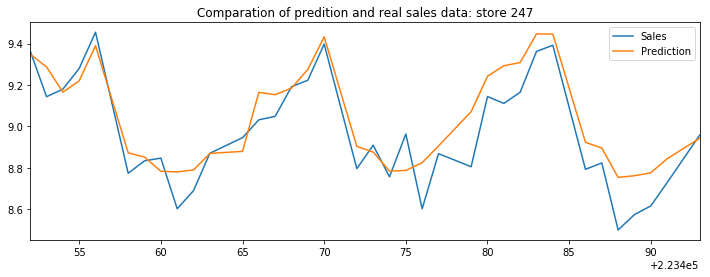

In [22]:
sample = pd.DataFrame(data = X_ytest_md)
sample['Prediction']=yhat
sample = pd.merge(X_xtest_md,sample, left_index= True, right_index=True)

s = pd.DataFrame(sample[sample['Store']==247],columns = ['Sales','Prediction'])
s.plot(title = 'Comparation of predition and real sales data: store {}'.format(247),figsize=(12,4))

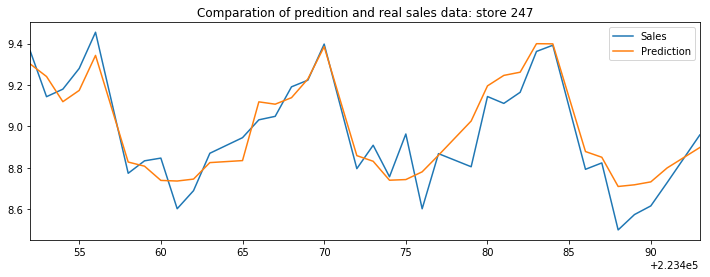

In [23]:
sample2 = pd.DataFrame(data = X_ytest_md)
sample2['Prediction']=yhat*0.995
sample2 = pd.merge(X_xtest_md,sample2, left_index= True, right_index=True)

s1 = pd.DataFrame(sample2[sample2['Store']==247],columns = ['Sales','Prediction'])
s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(247),figsize=(12,4))

In [18]:
xgb_model_final_md.save_model('final_model.model')

In [19]:
unseen = xgb.DMatrix(test_store_datax_md)

**修改4：对结果乘以一个系数修正数据分布**

In [20]:
test_predict = xgb_model_final_md.predict(unseen)

forecasts_md = pd.DataFrame({'Id': test_store_data_md['Id'], 
                          'Sales': np.expm1(test_predict*0.995)})
forecasts_md.head()

,Id,Sales
0,1,4445.250977
1,857,4623.343750
2,1713,4908.583008
3,2569,5519.445312
4,3425,5836.796387


In [21]:
forecasts_md.to_csv('forecasts_md.csv',index = False)